In [1]:
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/eyobmanhardt/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/eyobmanhardt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
application_train = pd.read_csv('home-credit-default-risk/application_train.csv')
POS_CASH_balance = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('home-credit-default-risk/bureau_balance.csv')
previous_application = pd.read_csv('home-credit-default-risk/previous_application.csv')
installments_payments = pd.read_csv('home-credit-default-risk/installments_payments.csv')
credit_card_balance = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')
bureau = pd.read_csv('home-credit-default-risk/bureau.csv')
application_test = pd.read_csv('home-credit-default-risk/application_test.csv')

## Display the head of each data file:

In [3]:
## application train data 
print(application_train.shape)
application_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Application  train

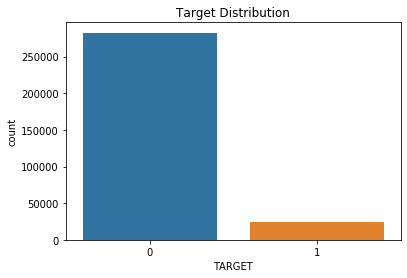

In [4]:
## target distribuation 
sns.countplot(application_train['TARGET'])
plt.title('Target Distribution')
plt.show()

**NOTE**
- Target variable: 1
    - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- Target variable: 0 
    - all other cases
    
Based on the graph above - the count for each instnace for the two classes differ by a large number. In other words, the class distrubation is highly imbalanced. 

## Missing values

In [5]:
nn, _ = application_train.shape
print(nn)

307511


In [6]:
def get_missing_data_info(df):
    num_of_instance, _ = df.shape
    #print(num_of_instance)
    names = {'index': 'feature', 
             0: 'PERC_missing_data'}
    
    missing_df = (df.isnull() \
        .sum(axis=0)/num_of_instance) \
        .to_frame() \
        .reset_index() \
        .rename(columns=names) \
        .sort_values(by='PERC_missing_data', ascending=False) \
        .reset_index(drop=True)
    
    d = {}
    # no missing 
    zero = missing_df[missing_df['PERC_missing_data'] == 0]
    d['x = 0'] = list(zero.feature)
    le_10 = missing_df[(missing_df['PERC_missing_data'] > 0.0) & (missing_df['PERC_missing_data'] <= 0.1)]
    
    d['0< x <= 25'] = list(missing_df[(missing_df['PERC_missing_data'] > 0.0) & (missing_df['PERC_missing_data'] <= 0.25)].feature)
    
    d['25 < x <= 50'] = list(missing_df[(missing_df['PERC_missing_data'] > 0.25) & (missing_df['PERC_missing_data'] <= 0.5)].feature)
    
    d['x > 50'] = list(missing_df[missing_df['PERC_missing_data'] > 0.5].feature)
    
    return missing_df, d
    
    
#get_missing_data_info(application_train)   

In [7]:
ms_df, d = get_missing_data_info(application_train)   
ms_df.head()

,feature,PERC_missing_data
0,COMMONAREA_MEDI,0.698723
1,COMMONAREA_AVG,0.698723
2,COMMONAREA_MODE,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330


In [8]:
for k,v in d.items():
    print(k, len(v))

x = 0 55
0< x <= 25 17
25 < x <= 50 9
x > 50 41


In [9]:
17+9+41

67

In [10]:
d['x > 50']

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE']

In [11]:
ms_df[ms_df.feature.isin(d['x > 50'])]

,feature,PERC_missing_data
0,COMMONAREA_MEDI,0.698723
1,COMMONAREA_AVG,0.698723
2,COMMONAREA_MODE,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330
5,NONLIVINGAPARTMENTS_MEDI,0.694330
6,FONDKAPREMONT_MODE,0.683862
7,LIVINGAPARTMENTS_MODE,0.683550
8,LIVINGAPARTMENTS_AVG,0.683550
9,LIVINGAPARTMENTS_MEDI,0.683550


In [12]:
list(ms_df[(ms_df['PERC_missing_data'] == 0.0)].feature)

['CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'FLAG_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'FLAG_EMAIL',
 'FLAG_CONT_MOBILE',
 'ORGANIZATION_TYPE',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'DAYS_ID_PUBLISH',
 'DAYS_RE

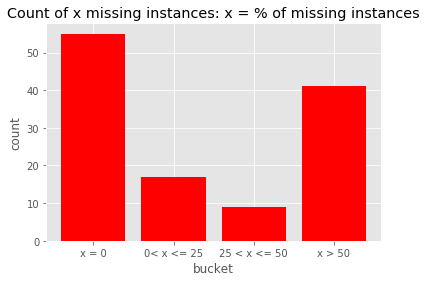

In [13]:
## bar chart of missing instances 
x_y = [(item[0], len(item[1])) for item in d.items()]
x,y = [i[0] for i in x_y ], [j[1] for j in x_y ]
pos = [i for i, _ in enumerate(x)]

plt.style.use('ggplot')
plt.bar(pos, y, color='red')
plt.xlabel("bucket")
plt.ylabel("count")
plt.title("Count of x missing instances: x = % of missing instances")
plt.xticks(pos, x)
plt.show()

**NOTE**
for the application train dataset
- number of features: 122
- number of features contianing **NO** missing values: 55
- number of features contianing missing values: 67
    - number of features containing: $ 0\% <$ **missing values** $\le 25\% \Rightarrow$ 17
    - number of features containing: $25\% <$ **missing values** $\le 50\% \Rightarrow$ 9
    - number of features containing: **missing values** $> 50\% \Rightarrow$ 41

## Further investgation of features containing more than 50% of missing values

In [14]:
ms_2 = application_train.loc[:, d['x > 50']]
ms_2.head()

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,...,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,HOUSETYPE_MODE
0,0.0144,0.0143,0.0144,0.0,0.0000,0.0000,reg oper account,0.022,0.0202,0.0205,...,0.0250,0.0247,0.0252,0.0690,0.0690,0.0690,0.0190,0.0198,0.0193,block of flats
1,0.0608,0.0605,0.0497,0.0,0.0039,0.0039,reg oper account,0.079,0.0773,0.0787,...,0.0968,0.0959,0.0924,0.0345,0.0345,0.0345,0.0549,0.0554,0.0558,block of flats
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ms_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COMMONAREA_MEDI           92646 non-null   float64
 1   COMMONAREA_AVG            92646 non-null   float64
 2   COMMONAREA_MODE           92646 non-null   float64
 3   NONLIVINGAPARTMENTS_MODE  93997 non-null   float64
 4   NONLIVINGAPARTMENTS_AVG   93997 non-null   float64
 5   NONLIVINGAPARTMENTS_MEDI  93997 non-null   float64
 6   FONDKAPREMONT_MODE        97216 non-null   object 
 7   LIVINGAPARTMENTS_MODE     97312 non-null   float64
 8   LIVINGAPARTMENTS_AVG      97312 non-null   float64
 9   LIVINGAPARTMENTS_MEDI     97312 non-null   float64
 10  FLOORSMIN_AVG             98869 non-null   float64
 11  FLOORSMIN_MODE            98869 non-null   float64
 12  FLOORSMIN_MEDI            98869 non-null   float64
 13  YEARS_BUILD_MEDI          103023 non-null  f

### sidetrack embed description of features into markdown
It will be usefull to embed the description for each feature in markdown. Alternatively,we can create a DataFrame; however, that method will require us to adjest the number of rows/cols we want to display and that will ultimately crash the notebook.  

In [16]:
import csv

In [17]:
!pwd

/Users/eyobmanhardt/Desktop/home_credit_ml_project


In [18]:
! ls home-credit-default-risk

HomeCredit_columns_description.csv      bureau.csv
HomeCredit_columns_description_fix.csv  bureau_balance.csv
HomeCredit_columns_description_fix.xls  credit_card_balance.csv
HomeCredit_columns_description_fix2.csv installments_payments.csv
POS_CASH_balance.csv                    previous_application.csv
application_test.csv                    sample_submission.csv
application_train.csv


In [19]:
path = 'home-credit-default-risk/HomeCredit_columns_description_fix2.csv'
path

'home-credit-default-risk/HomeCredit_columns_description_fix2.csv'

In [20]:
'|'.join(['1', 'application_{train|test}.csv', 'SK_ID_CURR', 'ID of loan in our sample', 'nc'])


'1|application_{train|test}.csv|SK_ID_CURR|ID of loan in our sample|nc'

In [21]:
xx = ['1', 'application_{train|test}.csv', 'SK_ID_CURR', 'ID of loan in our sample', '']
if len(xx[-1]) == 0:
    ## nc : no comment/note
    xx[-1] = 'nc'
    new_line = '|' + '|'.join(xx) + '|'
    print(new_line)

|1|application_{train|test}.csv|SK_ID_CURR|ID of loan in our sample|nc|


In [22]:
'application_{traintest}.csv'.replace('|', '-')

'application_{traintest}.csv'

| index | table | feature | description | notes |
| :--- | :---: | :---: | :---: | :---:|
|1|application_{train-test}.csv|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|nc|

In [37]:
## run this cell once

description_table = "| index | table | feature | description | notes |"
description_table += "\n" + "| :--- | :---: | :---: | :---: | :---:|"
with open(path) as fi:
    reader = csv.reader(fi, delimiter=',')
    # skip header 
    next(reader)
    for line in reader:
        ## no comment/notes for feature
        if len(line[-1]) == 0:
            line[-1] = 'nc'
         ## reomve pipe from   
        if line[1] == 'application_{train|test}.csv':
            line[1] = line[1].replace('|', '-')
            
        ## create a new line
        new_line = '|' + '|'.join(line) + '|'
        
        ## add line to description table
        description_table += '\n' + new_line
            
#print(description_table)

**description table**

| index | table | feature | description | notes |
| :--- | :---: | :---: | :---: | :---:|
|1|application_{train-test}.csv|SK_ID_CURR|ID of loan in our sample|nc|
|2|application_{train-test}.csv|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|nc|
|5|application_{train-test}.csv|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|nc|
|6|application_{train-test}.csv|CODE_GENDER|Gender of the client|nc|
|7|application_{train-test}.csv|FLAG_OWN_CAR|Flag if the client owns a car|nc|
|8|application_{train-test}.csv|FLAG_OWN_REALTY|Flag if client owns a house or flat|nc|
|9|application_{train-test}.csv|CNT_CHILDREN|Number of children the client has|nc|
|10|application_{train-test}.csv|AMT_INCOME_TOTAL|Income of the client|nc|
|11|application_{train-test}.csv|AMT_CREDIT|Credit amount of the loan|nc|
|12|application_{train-test}.csv|AMT_ANNUITY|Loan annuity|nc|
|13|application_{train-test}.csv|AMT_GOODS_PRICE|For consumer loans it is the price of the goods for which the loan is given|nc|
|14|application_{train-test}.csv|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|nc|
|15|application_{train-test}.csv|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,Ö)|nc|
|16|application_{train-test}.csv|NAME_EDUCATION_TYPE|Level of highest education the client achieved|nc|
|17|application_{train-test}.csv|NAME_FAMILY_STATUS|Family status of the client|nc|
|18|application_{train-test}.csv|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|nc|
|19|application_{train-test}.csv|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |
|20|application_{train-test}.csv|DAYS_BIRTH|Client's age in days at the time of application|time only relative to the application|
|21|application_{train-test}.csv|DAYS_EMPLOYED|How many days before the application the person started current employment|time only relative to the application|
|22|application_{train-test}.csv|DAYS_REGISTRATION|How many days before the application did client change his registration|time only relative to the application|
|23|application_{train-test}.csv|DAYS_ID_PUBLISH|How many days before the application did client change the identity document with which he applied for the loan|time only relative to the application|
|24|application_{train-test}.csv|OWN_CAR_AGE|Age of client's car|nc|
|25|application_{train-test}.csv|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|nc|
|26|application_{train-test}.csv|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|nc|
|27|application_{train-test}.csv|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|nc|
|28|application_{train-test}.csv|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|nc|
|29|application_{train-test}.csv|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|nc|
|30|application_{train-test}.csv|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|nc|
|31|application_{train-test}.csv|OCCUPATION_TYPE|What kind of occupation does the client have|nc|
|32|application_{train-test}.csv|CNT_FAM_MEMBERS|How many family members does client have|nc|
|33|application_{train-test}.csv|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|nc|
|34|application_{train-test}.csv|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|nc|
|35|application_{train-test}.csv|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|nc|
|36|application_{train-test}.csv|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
|37|application_{train-test}.csv|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|nc|
|38|application_{train-test}.csv|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|nc|
|39|application_{train-test}.csv|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|nc|
|40|application_{train-test}.csv|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|nc|
|41|application_{train-test}.csv|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|nc|
|42|application_{train-test}.csv|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|nc|
|43|application_{train-test}.csv|ORGANIZATION_TYPE|Type of organization where client works|nc|
|44|application_{train-test}.csv|EXT_SOURCE_1|Normalized score from external data source|normalized|
|45|application_{train-test}.csv|EXT_SOURCE_2|Normalized score from external data source|normalized|
|46|application_{train-test}.csv|EXT_SOURCE_3|Normalized score from external data source|normalized|
|47|application_{train-test}.csv|APARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|48|application_{train-test}.csv|BASEMENTAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|49|application_{train-test}.csv|YEARS_BEGINEXPLUATATION_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|50|application_{train-test}.csv|YEARS_BUILD_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|51|application_{train-test}.csv|COMMONAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|52|application_{train-test}.csv|ELEVATORS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|53|application_{train-test}.csv|ENTRANCES_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|54|application_{train-test}.csv|FLOORSMAX_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|55|application_{train-test}.csv|FLOORSMIN_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|56|application_{train-test}.csv|LANDAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|57|application_{train-test}.csv|LIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|58|application_{train-test}.csv|LIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|59|application_{train-test}.csv|NONLIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|60|application_{train-test}.csv|NONLIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|61|application_{train-test}.csv|APARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|62|application_{train-test}.csv|BASEMENTAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|63|application_{train-test}.csv|YEARS_BEGINEXPLUATATION_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|64|application_{train-test}.csv|YEARS_BUILD_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|65|application_{train-test}.csv|COMMONAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|66|application_{train-test}.csv|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|67|application_{train-test}.csv|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|68|application_{train-test}.csv|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|69|application_{train-test}.csv|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|70|application_{train-test}.csv|LANDAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|71|application_{train-test}.csv|LIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|72|application_{train-test}.csv|LIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|73|application_{train-test}.csv|NONLIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|74|application_{train-test}.csv|NONLIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|75|application_{train-test}.csv|APARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|76|application_{train-test}.csv|BASEMENTAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|77|application_{train-test}.csv|YEARS_BEGINEXPLUATATION_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|78|application_{train-test}.csv|YEARS_BUILD_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|79|application_{train-test}.csv|COMMONAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|80|application_{train-test}.csv|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|81|application_{train-test}.csv|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|82|application_{train-test}.csv|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|83|application_{train-test}.csv|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|84|application_{train-test}.csv|LANDAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|85|application_{train-test}.csv|LIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|86|application_{train-test}.csv|LIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|87|application_{train-test}.csv|NONLIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|88|application_{train-test}.csv|NONLIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|89|application_{train-test}.csv|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|90|application_{train-test}.csv|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|91|application_{train-test}.csv|TOTALAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|92|application_{train-test}.csv|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|93|application_{train-test}.csv|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|94|application_{train-test}.csv|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|nc|
|95|application_{train-test}.csv|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |nc|
|96|application_{train-test}.csv|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|nc|
|97|application_{train-test}.csv|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|nc|
|98|application_{train-test}.csv|DAYS_LAST_PHONE_CHANGE|How many days before application did client change phone|nc|
|99|application_{train-test}.csv|FLAG_DOCUMENT_2|Did client provide document 2|nc|
|100|application_{train-test}.csv|FLAG_DOCUMENT_3|Did client provide document 3|nc|
|101|application_{train-test}.csv|FLAG_DOCUMENT_4|Did client provide document 4|nc|
|102|application_{train-test}.csv|FLAG_DOCUMENT_5|Did client provide document 5|nc|
|103|application_{train-test}.csv|FLAG_DOCUMENT_6|Did client provide document 6|nc|
|104|application_{train-test}.csv|FLAG_DOCUMENT_7|Did client provide document 7|nc|
|105|application_{train-test}.csv|FLAG_DOCUMENT_8|Did client provide document 8|nc|
|106|application_{train-test}.csv|FLAG_DOCUMENT_9|Did client provide document 9|nc|
|107|application_{train-test}.csv|FLAG_DOCUMENT_10|Did client provide document 10|nc|
|108|application_{train-test}.csv|FLAG_DOCUMENT_11|Did client provide document 11|nc|
|109|application_{train-test}.csv|FLAG_DOCUMENT_12|Did client provide document 12|nc|
|110|application_{train-test}.csv|FLAG_DOCUMENT_13|Did client provide document 13|nc|
|111|application_{train-test}.csv|FLAG_DOCUMENT_14|Did client provide document 14|nc|
|112|application_{train-test}.csv|FLAG_DOCUMENT_15|Did client provide document 15|nc|
|113|application_{train-test}.csv|FLAG_DOCUMENT_16|Did client provide document 16|nc|
|114|application_{train-test}.csv|FLAG_DOCUMENT_17|Did client provide document 17|nc|
|115|application_{train-test}.csv|FLAG_DOCUMENT_18|Did client provide document 18|nc|
|116|application_{train-test}.csv|FLAG_DOCUMENT_19|Did client provide document 19|nc|
|117|application_{train-test}.csv|FLAG_DOCUMENT_20|Did client provide document 20|nc|
|118|application_{train-test}.csv|FLAG_DOCUMENT_21|Did client provide document 21|nc|
|119|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|nc|
|120|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|nc|
|121|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|nc|
|122|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|nc|
|123|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|nc|
|124|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|nc|
|125|bureau.csv|SK_ID_CURR|ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau |hashed|
|126|bureau.csv|SK_BUREAU_ID|Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)|hashed|
|127|bureau.csv|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|nc|
|128|bureau.csv|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded|
|129|bureau.csv|DAYS_CREDIT|How many days before current application did client apply for Credit Bureau credit|time only relative to the application|
|130|bureau.csv|CREDIT_DAY_OVERDUE|Number of days past due on CB credit at the time of application for related loan in our sample|nc|
|131|bureau.csv|DAYS_CREDIT_ENDDATE|Remaining duration of CB credit (in days) at the time of application in Home Credit|time only relative to the application|
|132|bureau.csv|DAYS_ENDDATE_FACT|Days since CB credit ended at the time of application in Home Credit (only for closed credit)|time only relative to the application|
|133|bureau.csv|AMT_CREDIT_MAX_OVERDUE|Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)|nc|
|134|bureau.csv|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|nc|
|135|bureau.csv|AMT_CREDIT_SUM|Current credit amount for the Credit Bureau credit|nc|
|136|bureau.csv|AMT_CREDIT_SUM_DEBT|Current debt on Credit Bureau credit|nc|
|137|bureau.csv|AMT_CREDIT_SUM_LIMIT|Current credit limit of credit card reported in Credit Bureau|nc|
|138|bureau.csv|AMT_CREDIT_SUM_OVERDUE|Current amount overdue on Credit Bureau credit|nc|
|139|bureau.csv|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|nc|
|140|bureau.csv|DAYS_CREDIT_UPDATE|How many days before loan application did last information about the Credit Bureau credit come|time only relative to the application|
|141|bureau.csv|AMT_ANNUITY|Annuity of the Credit Bureau credit|nc|
|142|bureau_balance.csv|SK_BUREAU_ID|Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table |hashed|
|143|bureau_balance.csv|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
|144|bureau_balance.csv|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,Ö [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,Ö 5 means DPD 120+ or sold or written off ] )|nc|
|145|POS_CASH_balance.csv|SK_ID_PREV |ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|nc|
|146|POS_CASH_balance.csv|SK_ID_CURR|ID of loan in our sample|nc|
|147|POS_CASH_balance.csv|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
|148|POS_CASH_balance.csv|CNT_INSTALMENT|Term of previous credit (can change over time)|nc|
|149|POS_CASH_balance.csv|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|nc|
|150|POS_CASH_balance.csv|NAME_CONTRACT_STATUS|Contract status during the month|nc|
|151|POS_CASH_balance.csv|SK_DPD|DPD (days past due) during the month of previous credit|nc|
|152|POS_CASH_balance.csv|SK_DPD_DEF|DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|nc|
|153|credit_card_balance.csv|SK_ID_PREV |ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
|154|credit_card_balance.csv|SK_ID_CURR|ID of loan in our sample|hashed|
|155|credit_card_balance.csv|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
|156|credit_card_balance.csv|AMT_BALANCE|Balance during the month of previous credit|nc|
|157|credit_card_balance.csv|AMT_CREDIT_LIMIT_ACTUAL|Credit card limit during the month of the previous credit|nc|
|158|credit_card_balance.csv|AMT_DRAWINGS_ATM_CURRENT|Amount drawing at ATM during the month of the previous credit|nc|
|159|credit_card_balance.csv|AMT_DRAWINGS_CURRENT|Amount drawing during the month of the previous credit|nc|
|160|credit_card_balance.csv|AMT_DRAWINGS_OTHER_CURRENT|Amount of other drawings during the month of the previous credit|nc|
|161|credit_card_balance.csv|AMT_DRAWINGS_POS_CURRENT|Amount drawing or buying goods during the month of the previous credit|nc|
|162|credit_card_balance.csv|AMT_INST_MIN_REGULARITY|Minimal installment for this month of the previous credit|nc|
|163|credit_card_balance.csv|AMT_PAYMENT_CURRENT|How much did the client pay during the month on the previous credit|nc|
|164|credit_card_balance.csv|AMT_PAYMENT_TOTAL_CURRENT|How much did the client pay during the month in total on the previous credit|nc|
|165|credit_card_balance.csv|AMT_RECEIVABLE_PRINCIPAL|Amount receivable for principal on the previous credit|nc|
|166|credit_card_balance.csv|AMT_RECIVABLE|Amount receivable on the previous credit|nc|
|167|credit_card_balance.csv|AMT_TOTAL_RECEIVABLE|Total amount receivable on the previous credit|nc|
|168|credit_card_balance.csv|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|nc|
|169|credit_card_balance.csv|CNT_DRAWINGS_CURRENT|Number of drawings during this month on the previous credit|nc|
|170|credit_card_balance.csv|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|nc|
|171|credit_card_balance.csv|CNT_DRAWINGS_POS_CURRENT|Number of drawings for goods during this month on the previous credit|nc|
|172|credit_card_balance.csv|CNT_INSTALMENT_MATURE_CUM|Number of paid installments on the previous credit|nc|
|173|credit_card_balance.csv|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|nc|
|174|credit_card_balance.csv|SK_DPD|DPD (Days past due) during the month on the previous credit|nc|
|175|credit_card_balance.csv|SK_DPD_DEF|DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|nc|
|176|previous_application.csv|SK_ID_PREV |ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) |hashed|
|177|previous_application.csv|SK_ID_CURR|ID of loan in our sample|hashed|
|178|previous_application.csv|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|nc|
|179|previous_application.csv|AMT_ANNUITY|Annuity of previous application|nc|
|180|previous_application.csv|AMT_APPLICATION|For how much credit did client ask on the previous application|nc|
|181|previous_application.csv|AMT_CREDIT|Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT|nc|
|182|previous_application.csv|AMT_DOWN_PAYMENT|Down payment on the previous application|nc|
|183|previous_application.csv|AMT_GOODS_PRICE|Goods price of good that client asked for (if applicable) on the previous application|nc|
|184|previous_application.csv|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|nc|
|185|previous_application.csv|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|
|186|previous_application.csv|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|nc|
|187|previous_application.csv|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|nc|
|188|previous_application.csv|NFLAG_MICRO_CASH|Flag Micro finance loan|nc|
|189|previous_application.csv|RATE_DOWN_PAYMENT|Down payment rate normalized on previous credit|normalized|
|190|previous_application.csv|RATE_INTEREST_PRIMARY|Interest rate normalized on previous credit|normalized|
|191|previous_application.csv|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized|
|192|previous_application.csv|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|nc|
|193|previous_application.csv|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|nc|
|194|previous_application.csv|DAYS_DECISION|Relative to current application when was the decision about previous application made|time only relative to the application|
|195|previous_application.csv|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|nc|
|196|previous_application.csv|CODE_REJECT_REASON|Why was the previous application rejected|nc|
|197|previous_application.csv|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|nc|
|198|previous_application.csv|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|nc|
|199|previous_application.csv|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|nc|
|200|previous_application.csv|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, Ö|nc|
|201|previous_application.csv|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|nc|
|202|previous_application.csv|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|nc|
|203|previous_application.csv|SELLERPLACE_AREA|Selling area of seller place of the previous application|nc|
|204|previous_application.csv|NAME_SELLER_INDUSTRY|The industry of the seller|nc|
|205|previous_application.csv|CNT_PAYMENT|Term of previous credit at application of the previous application|nc|
|206|previous_application.csv|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped|
|207|previous_application.csv|PRODUCT_COMBINATION|Detailed product combination of the previous application|nc|
|208|previous_application.csv|DAYS_FIRST_DRAWING|Relative to application date of current application when was the first disbursement of the previous application|time only relative to the application|
|209|previous_application.csv|DAYS_FIRST_DUE|Relative to application date of current application when was the first due supposed to be of the previous application|time only relative to the application|
|210|previous_application.csv|DAYS_LAST_DUE_1ST_VERSION|Relative to application date of current application when was the first due of the previous application|time only relative to the application|
|211|previous_application.csv|DAYS_LAST_DUE|Relative to application date of current application when was the last due date of the previous application|time only relative to the application|
|212|previous_application.csv|DAYS_TERMINATION|Relative to application date of current application when was the expected termination of the previous application|time only relative to the application|
|213|previous_application.csv|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|nc|
|214|installments_payments.csv|SK_ID_PREV |ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
|215|installments_payments.csv|SK_ID_CURR|ID of loan in our sample|hashed|
|216|installments_payments.csv|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|nc|
|217|installments_payments.csv|NUM_INSTALMENT_NUMBER|On which installment we observe payment|nc|
|218|installments_payments.csv|DAYS_INSTALMENT|When the installment of previous credit was supposed to be paid (relative to application date of current loan)|time only relative to the application|
|219|installments_payments.csv|DAYS_ENTRY_PAYMENT|When was the installments of previous credit paid actually (relative to application date of current loan)|time only relative to the application|
|220|installments_payments.csv|AMT_INSTALMENT|What was the prescribed installment amount of previous credit on this installment|nc|
|221|installments_payments.csv|AMT_PAYMENT|What the client actually paid on previous credit on this installment|nc|

## back to missing data :)

In [24]:
## recall the feature the had more than 50% of missing values
for col in d['x > 50']:
    print(col)

COMMONAREA_MEDI
COMMONAREA_AVG
COMMONAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAPARTMENTS_AVG
NONLIVINGAPARTMENTS_MEDI
FONDKAPREMONT_MODE
LIVINGAPARTMENTS_MODE
LIVINGAPARTMENTS_AVG
LIVINGAPARTMENTS_MEDI
FLOORSMIN_AVG
FLOORSMIN_MODE
FLOORSMIN_MEDI
YEARS_BUILD_MEDI
YEARS_BUILD_MODE
YEARS_BUILD_AVG
OWN_CAR_AGE
LANDAREA_MEDI
LANDAREA_MODE
LANDAREA_AVG
BASEMENTAREA_MEDI
BASEMENTAREA_AVG
BASEMENTAREA_MODE
EXT_SOURCE_1
NONLIVINGAREA_MODE
NONLIVINGAREA_AVG
NONLIVINGAREA_MEDI
ELEVATORS_MEDI
ELEVATORS_AVG
ELEVATORS_MODE
WALLSMATERIAL_MODE
APARTMENTS_MEDI
APARTMENTS_AVG
APARTMENTS_MODE
ENTRANCES_MEDI
ENTRANCES_AVG
ENTRANCES_MODE
LIVINGAREA_AVG
LIVINGAREA_MODE
LIVINGAREA_MEDI
HOUSETYPE_MODE


**NOTE** 

Based on the descriptions above, the features that contain a high volume of missing values are basic information/statitcs about the client's housing information. Therefore, without knowing where **(specific location - perhaps it will be benniftial to research where the data was sampled from and see if we can determine the spcific  location(s))** we can assume the following two things about these missing instances:

 - (1) the missing values corresponds to unkown information i.e the folowing statitcis/infoamtion about the specific house is not applicable for that house
     - for example house A - doesn't have a basement; therefore, all of the basement staticics: BASEMENTAREA_MEDI, BASEMENTAREA_AVG, BASEMENTAREA_MODE will be NA.
     
- (2) Simple case: Informaton was not provided or can't be determined (this can also be a consquence of case 1)

**Follow through assumption 1 train of thought**

- if assumption 1 is true then there should be a distinct relationship between features and the number of missing values relative to all of the features in our dataset (don't each feature in this dataset contains more than 50 % of missing values)

In other words if feature A is missng than feature B, C, D, ... will also be missing.

How would we test this?
- missingno library

In [25]:
# ! pip install missingno

In [26]:
import missingno as msno

In [27]:
%matplotlib inline

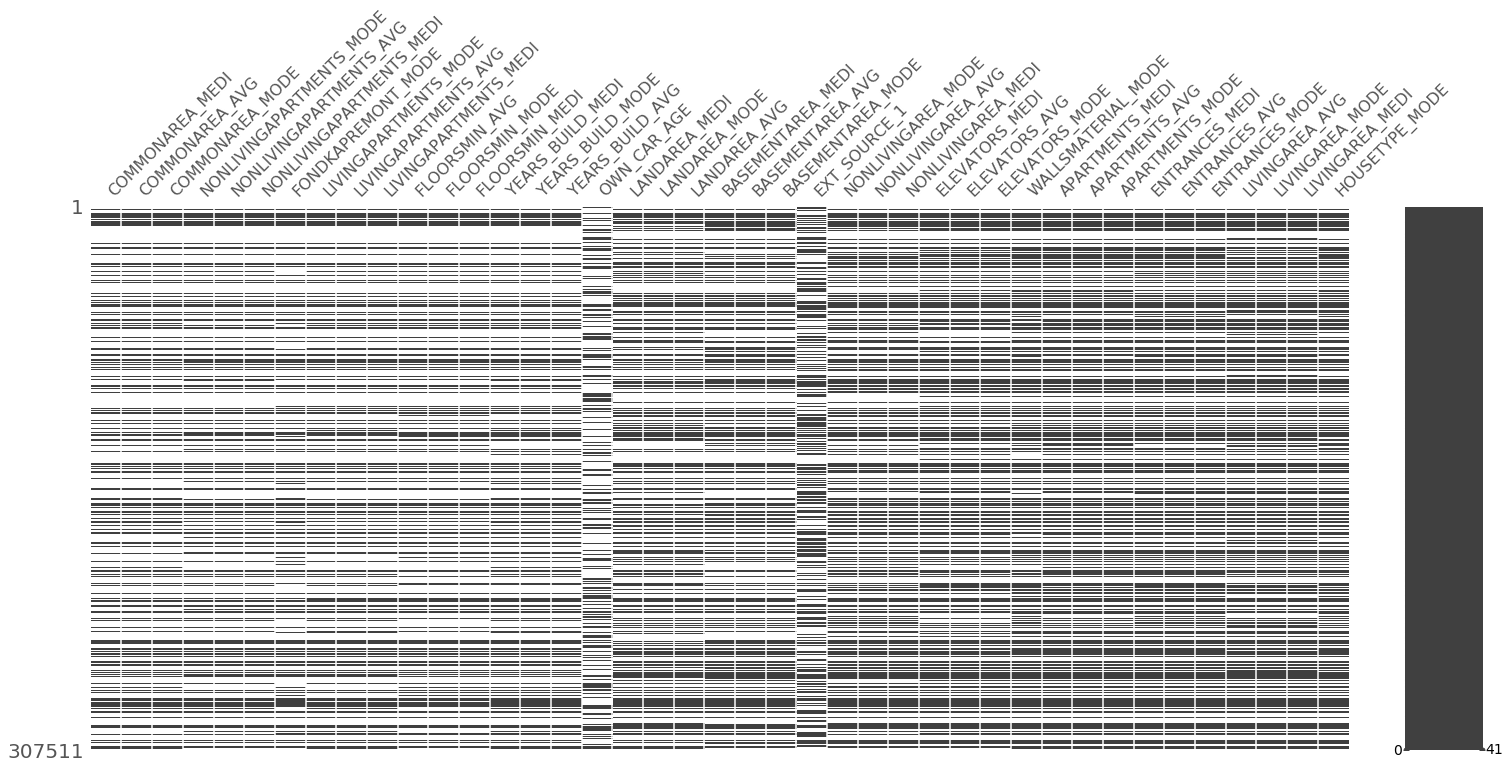

In [28]:
msno.matrix(ms_2)
plt.show()

**NOTE**
- Quite a few instances where all or almost all of the features have a missing value
- Significantly more missing values towards the first quadrant of features: COMMONAREA_MEDI - YEARS_BUILD_AVG
- Distinct features: OWN_CAR_AGE, EXT_SOURCE_1

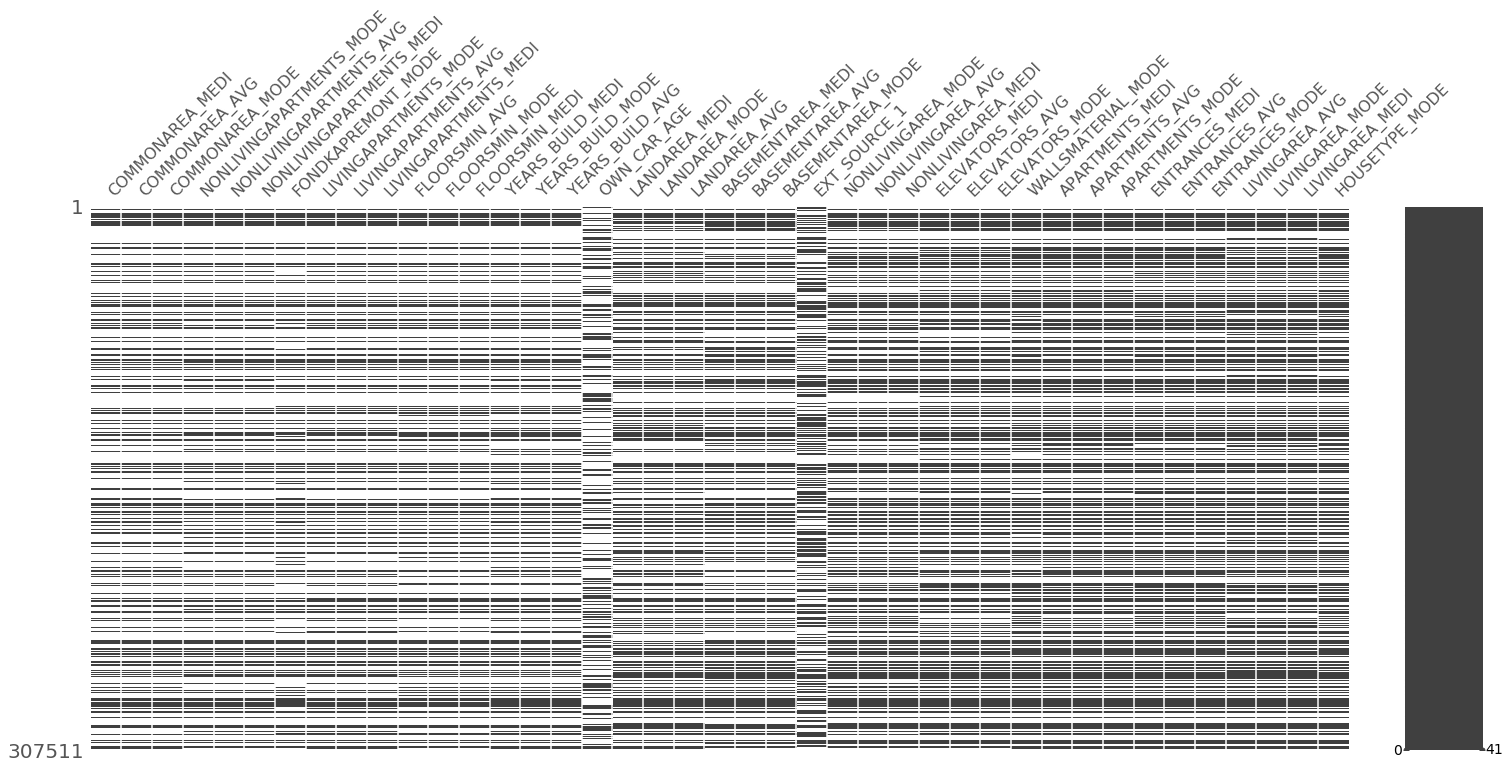

In [29]:
msno.matrix(ms_2, )

Possible cmap values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

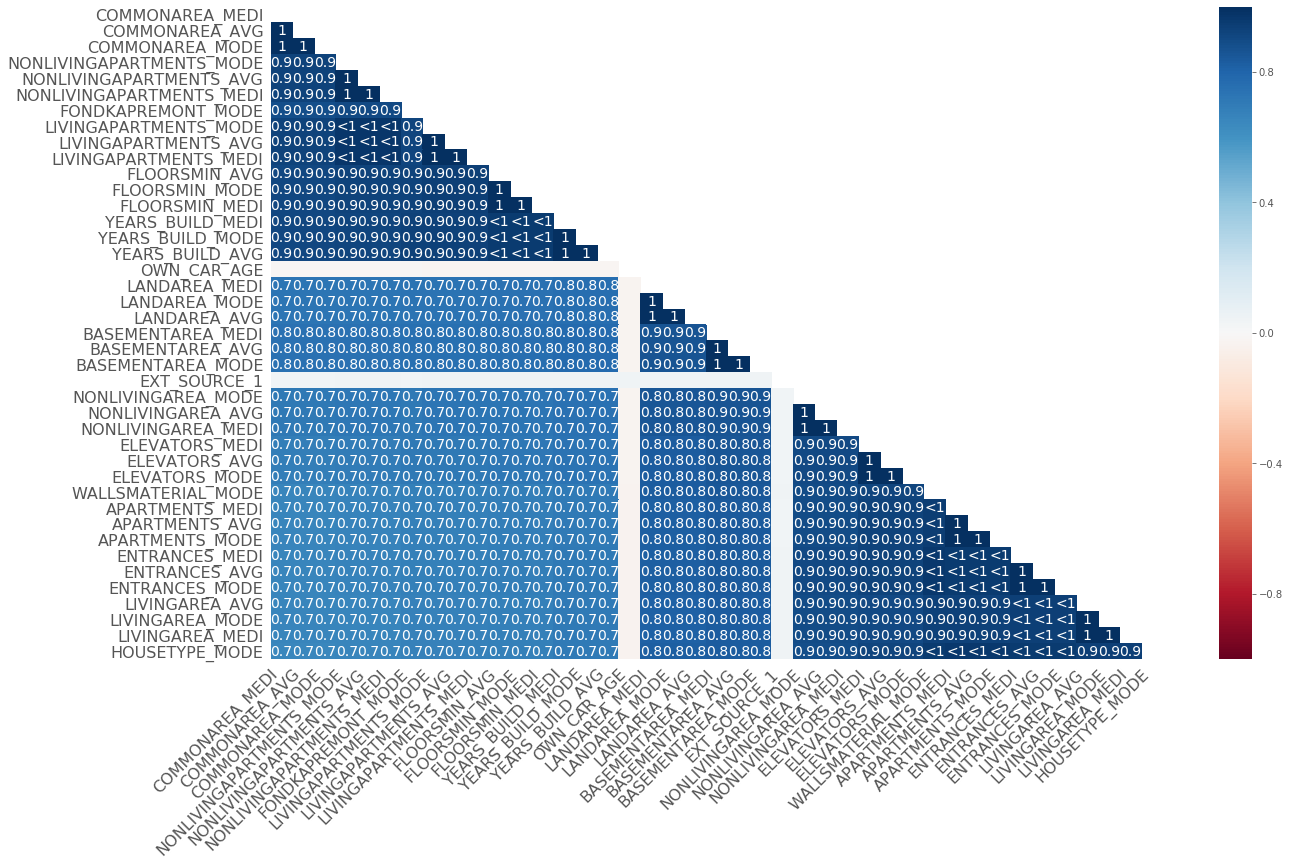

In [30]:
#RdBu #seismic
msno.heatmap(ms_2,inline=False, filter=None, n=0, 
             p=1,sort=None,figsize=(20, 12),fontsize=16, 
             cmap='RdBu', vmin=-1, vmax=1,cbar=True)
plt.show()

**NOTE**
- As we assumed, the missing values amongst the different features are highly correlated except for EXT_SOURCE_1 and OWN_CAR_AGE
- quite concern with '< 1' entries I don't know what that means ... :(

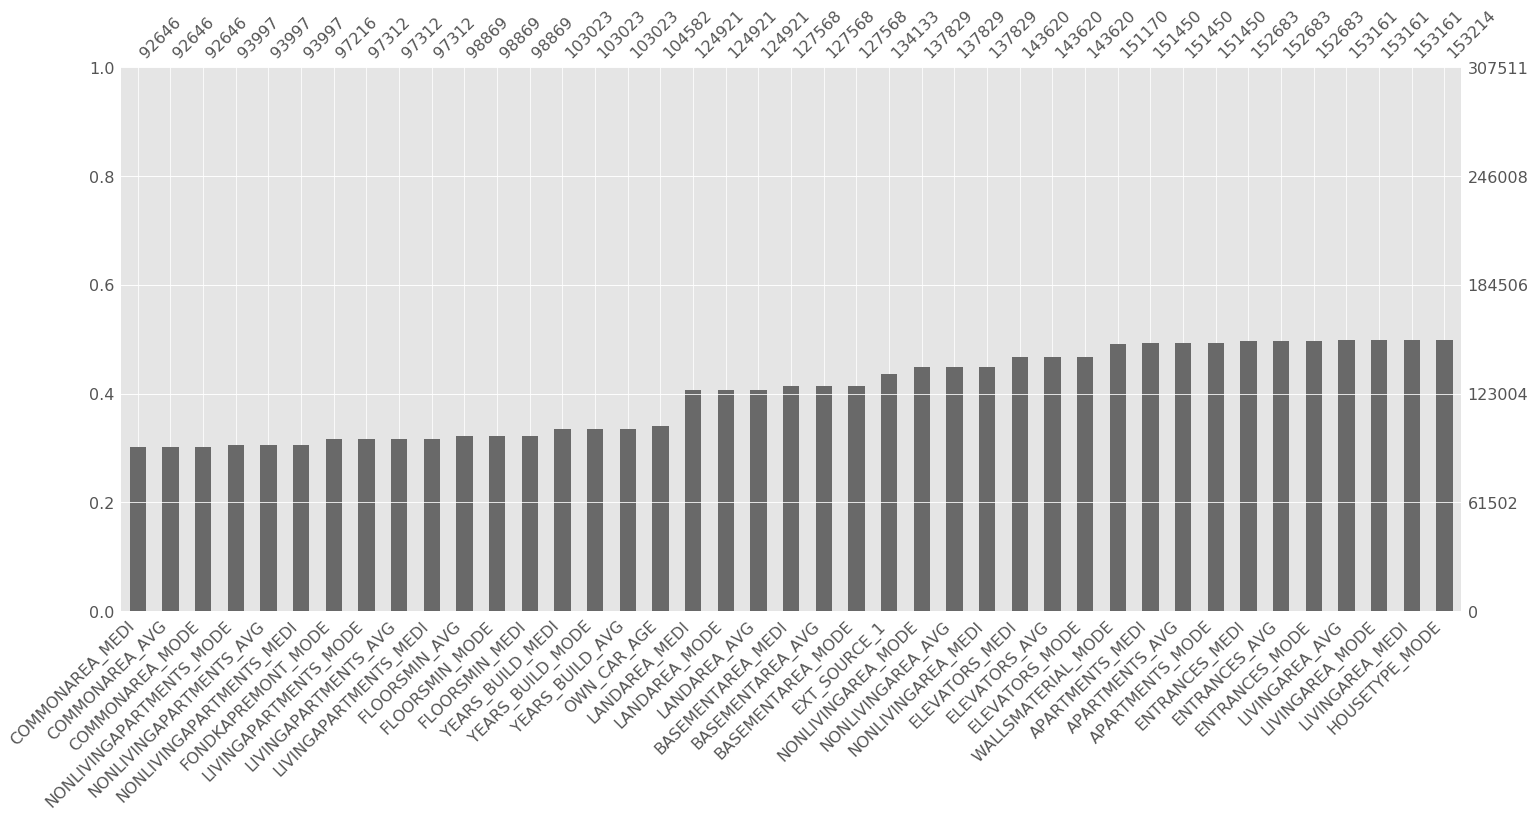

In [31]:
msno.bar(ms_2,)
#plt.title("prop of non-null values")
plt.show()

The bar graph above is similar to our previous bar graph; however, this graph displays the prop of non-null values with respect of each feature in the data set. In our precious bar graph displayed prop of missing values for all features that lie within a particular bucket.

## Missing value: conclusion

**MAIN QUESTION: HOW DO WE DEAL WITH THE MISSING VALUES?**

- The simplest solution is to drop them however, for now I don't think that's a good idea since we can still find more information about these values.
    - The majority of features that contain missing values are numerical type - therefore, we can impute or interperate the missing values once we understand the distrubation of these feature ---> next step dist

- We discovered: features with high volume of missing values tend to be correlated - specifically the missing values themselves are correlated. 
- Keep an eye out for EXT_SOURCE_1 and OWN_CAR_AGE

# Distrubation 

In [38]:
## identify the type of the features 
cat, numeric = (application_train.select_dtypes(include= [object]),
                application_train.select_dtypes(include= [int, float]))
print("# of categorical features: " + str(cat.shape[1]))
print("# of numerical features: " + str(numeric.shape[1]))

# of categorical features: 16
# of numerical features: 106


## categorical 

In [48]:
cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


Based on the display above, there appear to be four categorical features with binary values: 
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- EMERGENCYSTATE_MODE

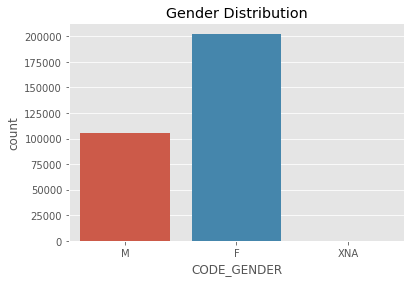

In [51]:
sns.countplot(cat['CODE_GENDER'])
plt.title('Gender Distribution')
plt.show()

In [63]:
cat['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**NOTE**
- Approximately - there are twice as many female than man in this dataset
- four instances of unknown gender: we should most likely drop these instances .. 

In [167]:
202448/ (202448+105059+4)

0.6583439291602576

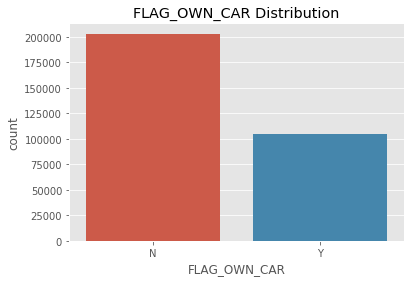

In [56]:
sns.countplot(cat['FLAG_OWN_CAR'])
plt.title('FLAG_OWN_CAR Distribution')
plt.show()

In [64]:
cat['FLAG_OWN_CAR'].value_counts(dropna=False)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

**NOTE**
- About 2/3 of the population doesn't own a car

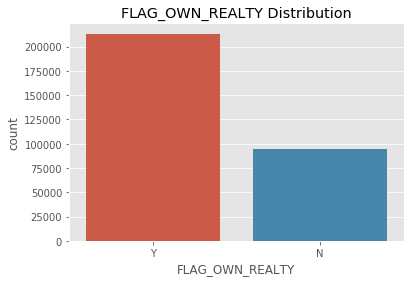

In [60]:
sns.countplot(cat['FLAG_OWN_REALTY'])
plt.title('FLAG_OWN_REALTY Distribution')
plt.show()

In [65]:
cat['FLAG_OWN_REALTY'].value_counts(dropna=False)

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

**NOTE**

- About 70% of the clients in the dataset owns a house instead of a flat

In [70]:
213312/(213312+94199)

0.6936727466659729

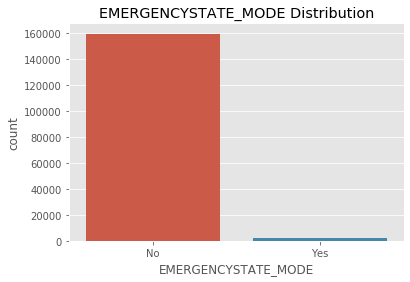

In [62]:
sns.countplot(cat['EMERGENCYSTATE_MODE'])
plt.title('EMERGENCYSTATE_MODE Distribution')
plt.show()

In [68]:
cat['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

No     159428
NaN    145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [71]:
145755/(159428+145755+2328)

0.47398304450897694

In [72]:
159428/(159428+145755+2328)

0.5184464945969413

In [73]:
2328/(159428+145755+2328)

0.007570460894081837

In [75]:
cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

**NOTE**

- less than 1% --> yes
- about 50% --> no and 50% --> unknown (NAN)
    - The EMERGENCYSTATE_MODE for each client is either unknown or no

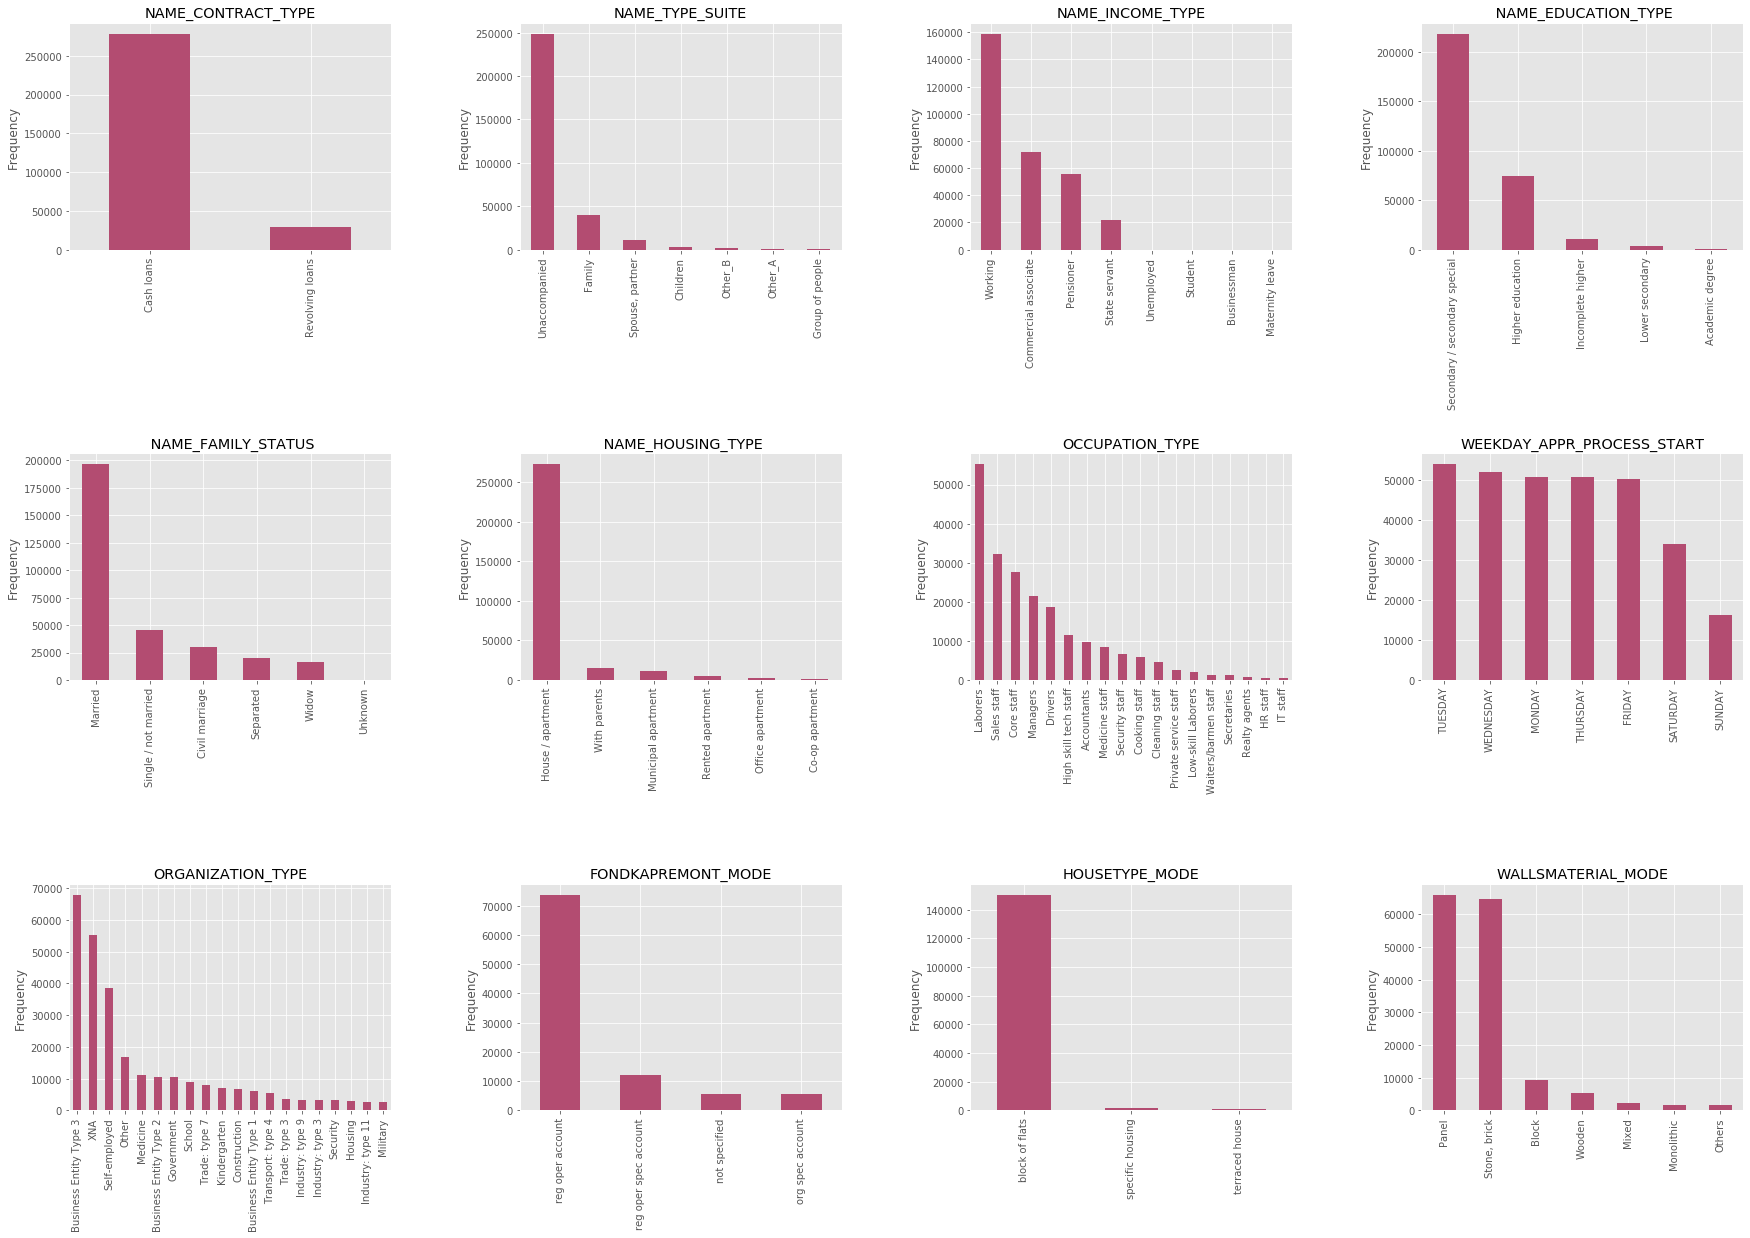

In [96]:
## do this by hand ... later make it better

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(30,20)) # 12 plots 

# row 1
# NAME_CONTRACT_TYPE
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('NAME_CONTRACT_TYPE')
cat['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                color = '#b34c71',
                                                                                ax=axes[0,0])

# NAME_TYPE_SUITE
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('NAME_TYPE_SUITE')
cat['NAME_TYPE_SUITE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                color = '#b34c71',
                                                                                ax=axes[0,1])
# NAME_INCOME_TYPE
axes[0,2].set_ylabel('Frequency')
axes[0,2].set_title('NAME_INCOME_TYPE')
cat['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                color = '#b34c71',
                                                                                ax=axes[0,2])
# NAME_EDUCATION_TYPE
axes[0,3].set_ylabel('Frequency')
axes[0,3].set_title(' NAME_EDUCATION_TYPE')
cat['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[0,3])
# row 2

# NAME_FAMILY_STATUS
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title(' NAME_FAMILY_STATUS')
cat['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,0])
# NAME_HOUSING_TYPE
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title(' NAME_HOUSING_TYPE')
cat['NAME_HOUSING_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,1])
# OCCUPATION_TYPE
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('OCCUPATION_TYPE')
cat['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,2])
# WEEKDAY_APPR_PROCESS_START
axes[1,3].set_ylabel('Frequency')
axes[1,3].set_title('WEEKDAY_APPR_PROCESS_START')
cat['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,3])
# row 3

# ORGANIZATION_TYPE
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('ORGANIZATION_TYPE')
cat['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,0])
# FONDKAPREMONT_MODE
axes[2,1].set_ylabel('Frequency')
axes[2,1].set_title('FONDKAPREMONT_MODE')
cat['FONDKAPREMONT_MODE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,1])
# HOUSETYPE_MODE
axes[2,2].set_ylabel('Frequency')
axes[2,2].set_title('HOUSETYPE_MODE')
cat['HOUSETYPE_MODE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,2])
# WALLSMATERIAL_MODE
axes[2,3].set_ylabel('Frequency')
axes[2,3].set_title('WALLSMATERIAL_MODE')
cat['WALLSMATERIAL_MODE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,3])
plt.subplots_adjust(hspace = 0.9, wspace = 0.4)
plt.show()

**NOTE**

NAME_CONTRACT_TYPE:
- Two type of contract: **cash loan** and **Revolving loans**
- The majority of the clients request **cash loan** contract 

NAME_TYPE_SUITE
-  The majority of the clients were **unaccompanied** when applying for the previous application

NAME_INCOME_TYPE
- almost all of the clients are employed (which makes sense)

NAME_FAMILY_STATUS
- The majority of the clients are married 

WEEKDAY_APPR_PROCESS_START
- Clients start their loan application ~ uniformly Monday - Friday 
- less so on the weekend

NAME_HOUSING_TYPE - current housing situation 
- the majority of the clients either live in a house or apartment
- some live with their parents


In [87]:
cat['WALLSMATERIAL_MODE'].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

## Numerical data 
 Since there are quite a few of numerical features ... we're going to pick and choose the ones we want to investigate based on their description 

In [99]:
numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
hand_pick = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
            'DAYS_EMPLOYED', 'DAYS_BIRTH']
num_data = numeric.loc[:, hand_pick]
num_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH
0,202500.0,406597.5,24700.5,351000.0,-637,-9461
1,270000.0,1293502.5,35698.5,1129500.0,-1188,-16765
2,67500.0,135000.0,6750.0,135000.0,-225,-19046
3,135000.0,312682.5,29686.5,297000.0,-3039,-19005
4,121500.0,513000.0,21865.5,513000.0,-3038,-19932


In [102]:
num_data.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,63815.045904,-16036.995067
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,141275.766519,4363.988632
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-17912.000000,-25229.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-2760.000000,-19682.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-1213.000000,-15750.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-289.000000,-12413.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,365243.000000,-7489.000000


**NOTE**
- NOTE: DAYS_EMPLOYED and DAYS_BIRTH is relative to the beginning of the application
- The stats for DAYS_EMPLOYED looks very suspicious (need to investigate)

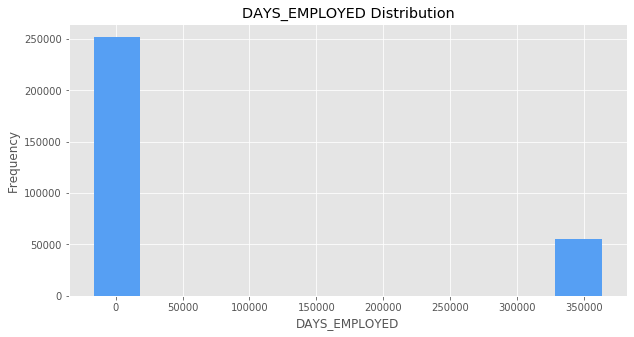

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(num_data['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED', color = '#569FF3', rwidth=0.9) 
ax.set_xlabel('DAYS_EMPLOYED')
ax.set_ylabel('Frequency')
ax.set_title('DAYS_EMPLOYED Distribution')
plt.show()

In [107]:
num_data.loc[num_data['DAYS_EMPLOYED'] > 350000, ['DAYS_EMPLOYED']]

,DAYS_EMPLOYED
8,365243
11,365243
23,365243
38,365243
43,365243
...,...
307469,365243
307483,365243
307487,365243
307505,365243


In [111]:
num_data.loc[num_data['DAYS_EMPLOYED'] == 365243, ['DAYS_EMPLOYED']]

55374

DAYS_EMPLOYED: How many days before the application the person started current employment

i.e how many days have each client been working at current job prior to starting or completing the application. 

i.e if you're employed at X company - how long have you been working (in days) at X company? 

Therefore, the 55374 entries that have the value 365243 days must be an error ... because that implies these clients have been working at their current job for about 365243/365 ~ 100 years. 

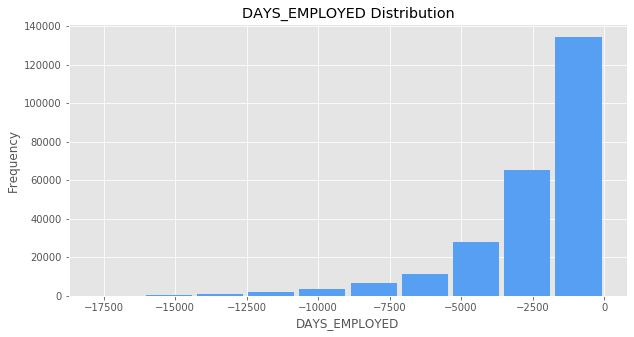

In [116]:
## NOW look at the dist without the bad entries 
yy = num_data.loc[num_data['DAYS_EMPLOYED'] != 365243, ['DAYS_EMPLOYED']]
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(yy['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED', color = '#569FF3', rwidth=0.9) 
ax.set_xlabel('DAYS_EMPLOYED')
ax.set_ylabel('Frequency')
ax.set_title('DAYS_EMPLOYED Distribution')
plt.show()

- the negative employment day value doesn't make sense (at least to me) --> The lowest possible value should be zero i.e client is unemployed. 

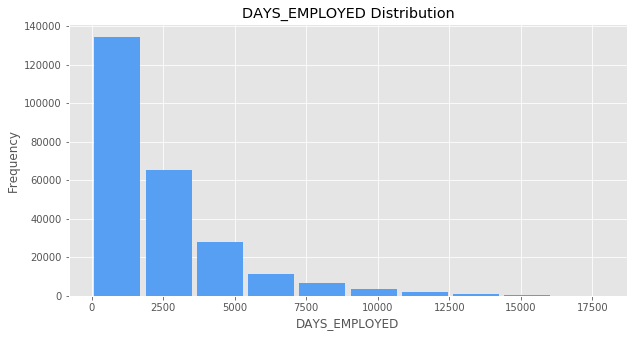

In [117]:
yy['DAYS_EMPLOYED'] = yy['DAYS_EMPLOYED'].apply(lambda x: abs(x))
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(yy['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED', color = '#569FF3', rwidth=0.9) 
ax.set_xlabel('DAYS_EMPLOYED')
ax.set_ylabel('Frequency')
ax.set_title('DAYS_EMPLOYED Distribution')
plt.show()

In [119]:
yy.describe()

,DAYS_EMPLOYED
count,252137.000000
mean,2384.169325
std,2338.360162
min,0.000000
25%,767.000000
50%,1648.000000
75%,3175.000000
max,17912.000000


- The stats above makes a lot more sense: on average clients have worked 6 years at a particular company prior to starting the application. Very few are unemployed or have worked over 50 years. 

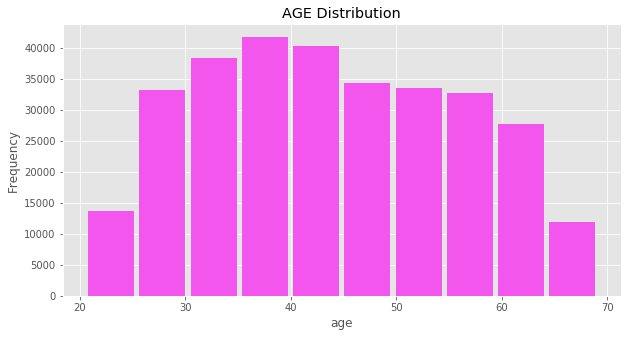

In [131]:
num_data['DAYS_BIRTH'] = num_data['DAYS_BIRTH'].apply(lambda x: abs(x)/365)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(num_data['DAYS_BIRTH'], label = 'DAYS_BIRTH', color = '#F356ED', rwidth=0.9) 
ax.set_xlabel('age')
ax.set_ylabel('Frequency')
ax.set_title('AGE Distribution')
plt.show()


**NOTE**
- The average age of the client is about 43

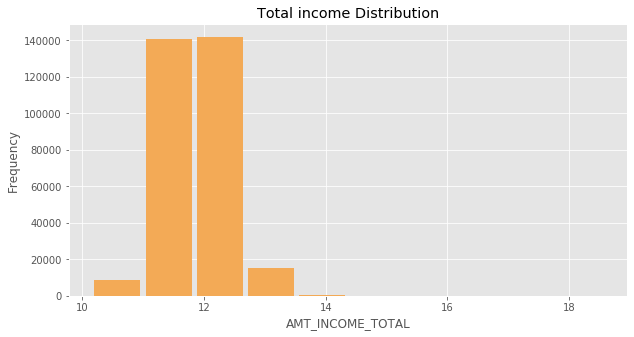

In [134]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(np.log(num_data['AMT_INCOME_TOTAL']), label = 'AMT_INCOME_TOTAL', color = '#F3AA56', rwidth=0.9) 
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('Frequency')
ax.set_title('Total income Distribution')
plt.show()


**NOTE**
- The average total income is about 160,000

In [ ]:
'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',

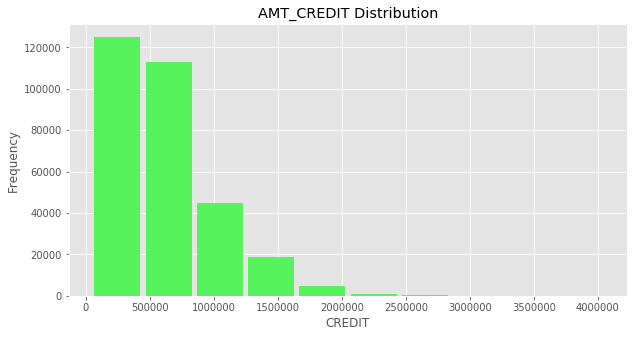

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(num_data['AMT_CREDIT'], label = 'AMT_CREDIT', color = '#56F35C', rwidth=0.9) 
ax.set_xlabel('CREDIT')
ax.set_ylabel('Frequency')
ax.set_title('AMT_CREDIT Distribution')
plt.show()


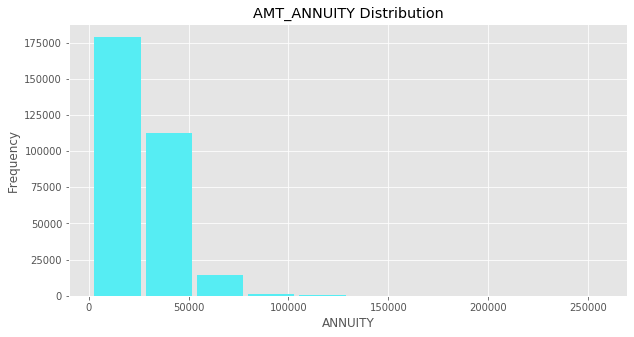

In [144]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(num_data['AMT_ANNUITY'], label = 'AMT_ANNUITY', color = '#56EDF3', rwidth=0.9) 
ax.set_xlabel('ANNUITY')
ax.set_ylabel('Frequency')
ax.set_title('AMT_ANNUITY Distribution')
plt.show()


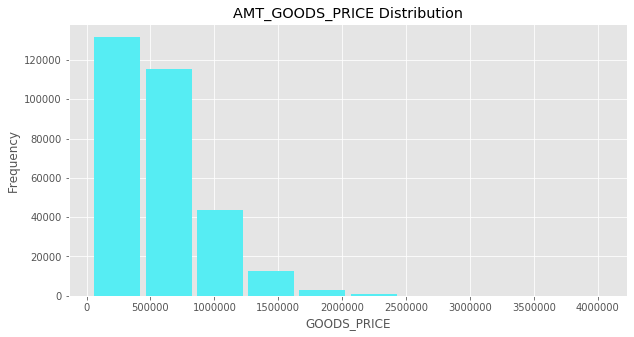

In [145]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(num_data['AMT_GOODS_PRICE'], label = 'AMT_GOODS_PRICE', color = '#56EDF3', rwidth=0.9) 
ax.set_xlabel('GOODS_PRICE')
ax.set_ylabel('Frequency')
ax.set_title('AMT_GOODS_PRICE Distribution')
plt.show()


# POS_CASH_balance 

In [146]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [147]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [148]:
POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


**NOTE**
- need to understand why all the values for months balance is negative ... based on description the values should be 0 or -1 .. ?

In [152]:
POS_CASH_balance[['MONTHS_BALANCE']].head(20)

,MONTHS_BALANCE
0,-31
1,-33
2,-32
3,-35
4,-35
5,-32
6,-38
7,-35
8,-31
9,-32


# previous_application

In [153]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- The following features: DAYS_FIRST_DRAWING	DAYS_FIRST_DUE	DAYS_LAST_DUE_1ST_VERSION	DAYS_LAST_DUE	DAYS_TERMINATION appear to have the same error as BIRTH_DAY in application_train

In [166]:
rel_days = ["DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE","DAYS_TERMINATION"]
previous_application[rel_days].head()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,365243.0,-42.0,300.0,-42.0,-37.0
1,365243.0,-134.0,916.0,365243.0,365243.0
2,365243.0,-271.0,59.0,365243.0,365243.0
3,365243.0,-482.0,-152.0,-182.0,-177.0
4,NaN,NaN,NaN,NaN,NaN


In [154]:
ms3, d = get_missing_data_info(previous_application)

In [156]:
for i in d.items():
    print(i[0], len(i[1]))

x = 0 21
0< x <= 25 5
25 < x <= 50 7
x > 50 4


In [163]:
type(d['x > 50'])

list

In [162]:
list(d['x > 50'])

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT']

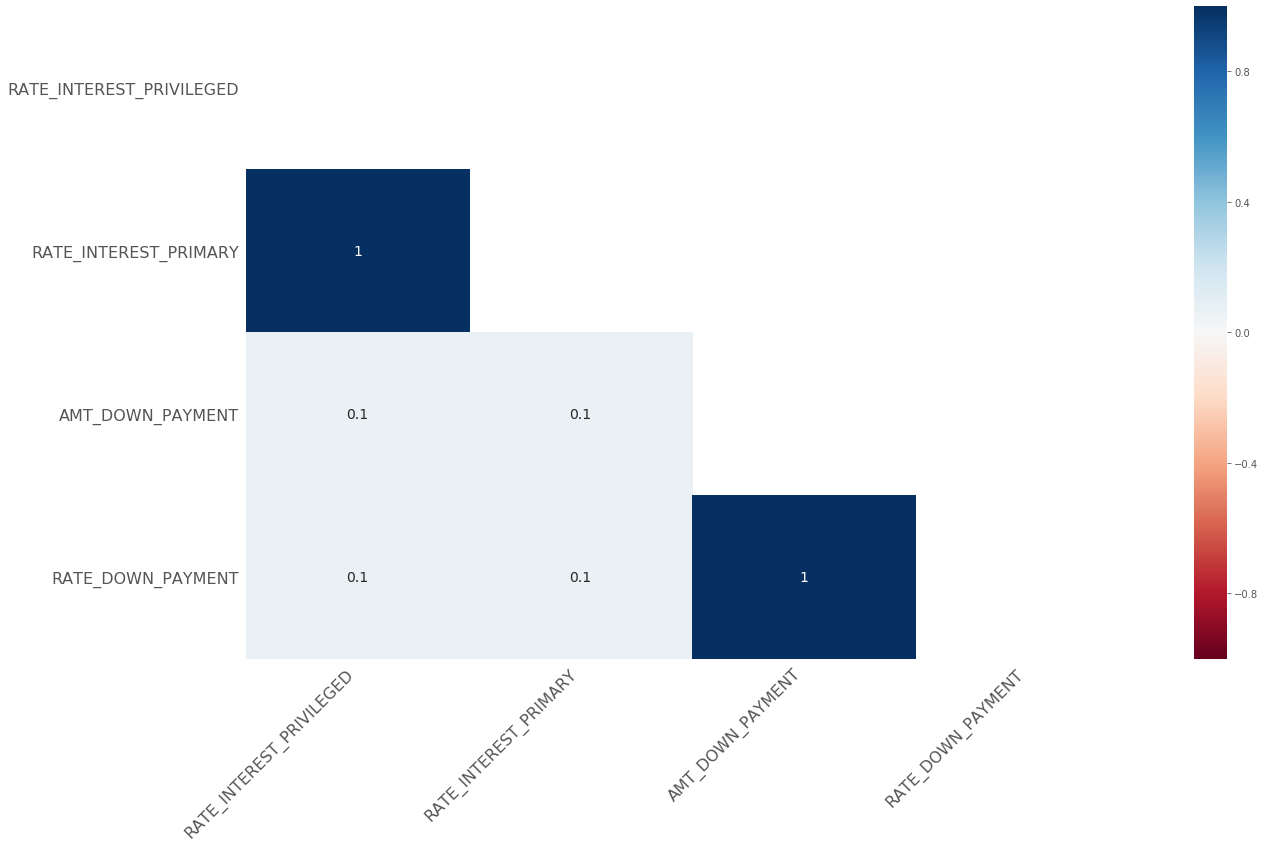

In [165]:
msno.heatmap(previous_application.loc[:, d['x > 50']])
plt.show()

In [32]:
from itertools import combinations

In [33]:
def get_pairs(num, df):
    col = list(df.columns)
    pairs = list(combinations(col, num))
    
    d = dict(map(lambda key: (key, 0), pairs))
    
    for _, row in df.isnull().iterrows():
        for pair in pairs:
            if row[list(pair)].sum() == num:
                d[pair] += 1
    return d

In [34]:
# for i, row in dd.iterrows():
#     print(row[['COMMONAREA_MEDI', 'COMMONAREA_AVG']].sum())
#     break

In [35]:
# print(POS_CASH_balance.shape)
# POS_CASH_balance.head()

# print(bureau_balance.shape)
# bureau_balance.head()

# print(previous_application.shape)
# previous_application.head()

# print(installments_payments.shape)
# installments_payments.head()

# print(credit_card_balance.shape)
# credit_card_balance.head()

# print(application_test.shape)
# application_test.head()